In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
nltk.download('all')
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Project II/data/IMDB Dataset.csv')
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df['word count'] = df['review'].apply(lambda x: len(str(x).split(" ")))
df.sentiment.replace({'positive': 1, 'negative': 0}, inplace=True)
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [7]:
from nltk.corpus import words
nltk.download('words')
word_list = words.words()

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [8]:
def data_processing(text):
    text = text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text_tokens = word_tokenize(text)
    filtered_text = [word for word in text_tokens if word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_text = [stemmer.stem(word) for word in filtered_text]
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in stemmed_text]
    return " ".join(lemmatized_text)


In [9]:
df.review = df['review'].apply(data_processing)
df['word count'] = df['review'].apply(lambda x: len(str(x).split(" ")))
df.head(20)

,review,sentiment,word count
0,one review mention watch 1 oz episod hook righ...,1,163
1,wonder littl product film techniqu unassum old...,1,86
2,thought wonder way spend time hot summer weeke...,1,85
3,basic famili littl boy jake think zombi closet...,0,66
4,petter mattei love time money visual stun film...,1,125
5,probabl time favorit movi stori selfless sacri...,1,56
6,sure would like see resurrect date seahunt ser...,1,76
7,show amaz fresh innov idea 70 first air first ...,0,83
8,encourag posit comment film look forward watch...,0,64
9,like origin gut wrench laughter like movi youn...,1,17


In [10]:
duplicated_count = df.duplicated().sum()
print("Number of duplicated rows: ", duplicated_count)

Number of duplicated rows:  427


In [11]:
df=df.drop_duplicates('review')

In [12]:
sent_freq = df['review'].apply(lambda x: len(str(x).split(" ")))
sent_freq.describe()

count    49573.000000
mean       119.630202
std         90.330026
min          3.000000
25%         64.000000
50%         89.000000
75%        145.000000
max       1429.000000
Name: review, dtype: float64

In [13]:
word_tokens_freq = df['review'].str.split(expand=True).stack().value_counts()
word_tokens_freq.describe()


count     73185.000000
mean         81.033381
std         865.821073
min           1.000000
25%           1.000000
50%           2.000000
75%          11.000000
max      102437.000000
dtype: float64

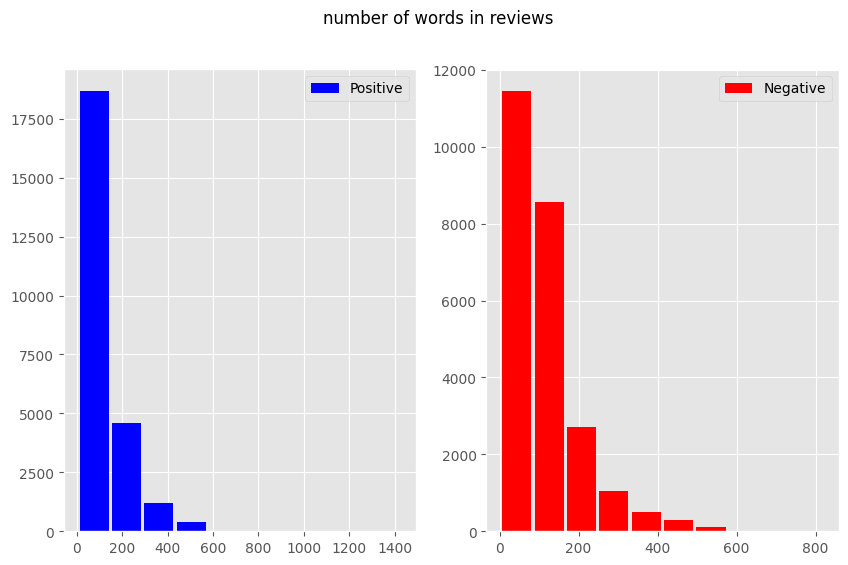

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(df[df['sentiment'] == 1]['review'].str.split().apply(lambda x: len(x)),
           label='Positive', color='blue', rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(df[df['sentiment'] == 0]['review'].str.split().apply(lambda x: len(x)),
           label='Negative', color='red', rwidth=0.9)
ax[1].legend(loc='upper right')
fig.suptitle("number of words in reviews")
plt.show()

In [15]:
pos_reviews = df[df['sentiment'] == 1]
pos_reviews.head()

,review,sentiment,word count
0,one review mention watch 1 oz episod hook righ...,1,163
1,wonder littl product film techniqu unassum old...,1,86
2,thought wonder way spend time hot summer weeke...,1,85
4,petter mattei love time money visual stun film...,1,125
5,probabl time favorit movi stori selfless sacri...,1,56


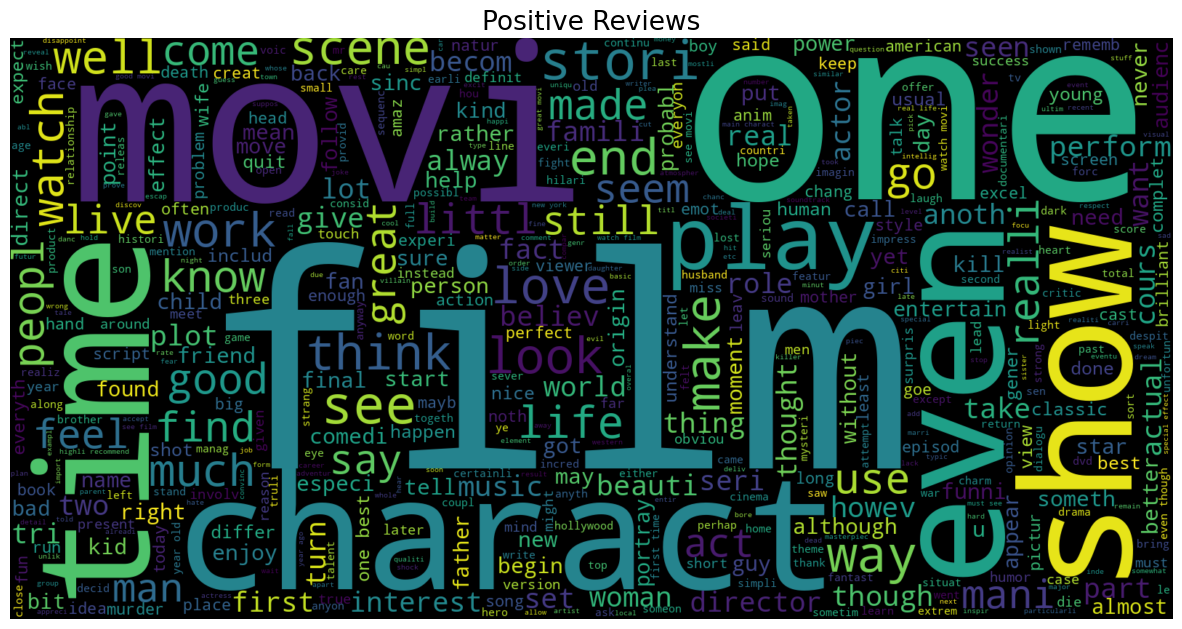

In [16]:
text = " ".join(review for review in pos_reviews.review)
plt.figure(figsize=(15, 10), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Reviews", fontsize=19)
plt.show()


In [17]:
word_pos_tokens_freq = pos_reviews['review'].str.split(
    expand=True).stack().value_counts()
word_pos_tokens_freq[:20]


film       50701
movi       44614
one        28166
like       20477
time       16552
good       15193
see        15077
stori      14144
charact    13953
make       13758
great      13045
well       13022
watch      12834
get        12641
love       12412
show       11022
also       10759
realli     10699
would      10546
play       10024
dtype: int64

In [18]:
px.bar(word_pos_tokens_freq[:20], x=word_pos_tokens_freq[:20].values, y=word_pos_tokens_freq[:20].index,
       title='Most commom words in positive reviews', color=word_pos_tokens_freq[:20].index)


In [19]:
neg_reviews = df[df['sentiment'] == 0]
neg_reviews.head()


,review,sentiment,word count
3,basic famili littl boy jake think zombi closet...,0,66
7,show amaz fresh innov idea 70 first air first ...,0,83
8,encourag posit comment film look forward watch...,0,64
10,phil alien one quirki film humour base around ...,0,50
11,saw movi 12 came recal scariest scene big bird...,0,84


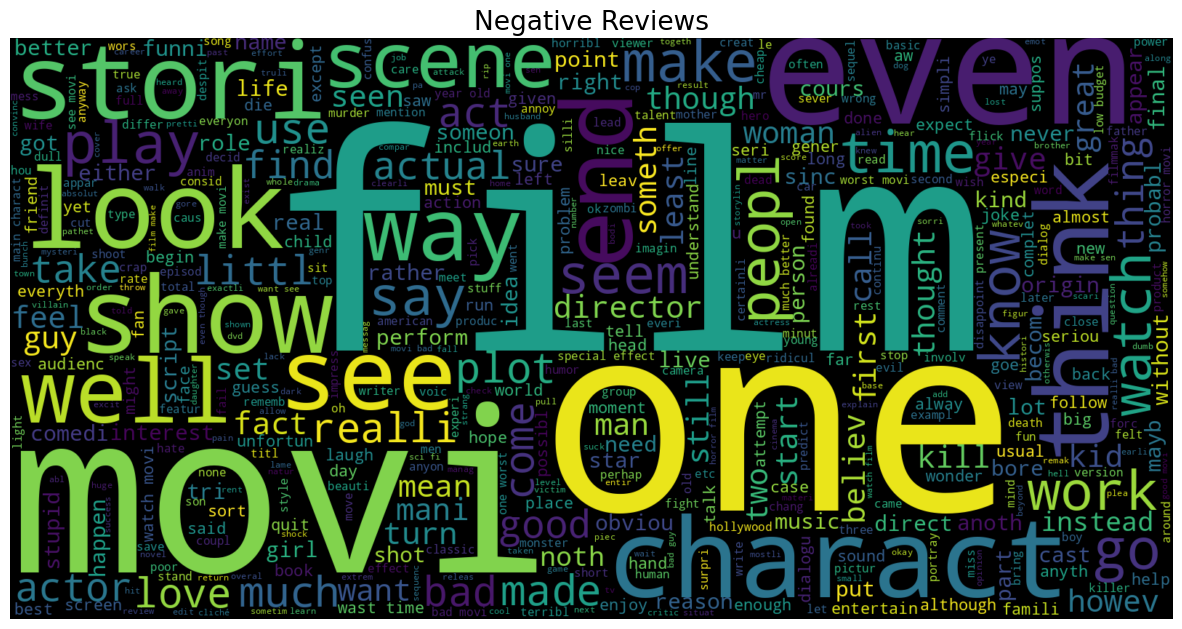

In [20]:
text = " ".join(review for review in neg_reviews.review)
plt.figure(figsize=(15, 10), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Reviews", fontsize=19)
plt.show()


In [21]:
word_neg_tokens_freq = neg_reviews['review'].str.split(
    expand=True).stack().value_counts()
word_neg_tokens_freq[:20]

movi       57823
film       44475
one        26847
like       24339
make       16054
even       15260
time       15127
get        15091
good       14772
watch      14767
bad        14609
charact    14152
would      13850
see        12915
realli     12216
look       11633
scene      11257
stori      10959
act        10469
much        9970
dtype: int64

In [22]:
px.bar(word_neg_tokens_freq[:20], x=word_neg_tokens_freq[:20].values, y=word_neg_tokens_freq[:20].index,
       title='Most commom words in negative reviews', color=word_neg_tokens_freq[:20].index)


In [24]:
df.to_csv('/content/drive/MyDrive/Project II/data/data_normalized.csv', index=False)
